# Loading Dataset

In [1]:
import pandas as pd

# load dataset
df = pd.read_csv(r"data/city_temperature.csv")
df.head()

C:\Users\Admins\AppData\Local\Temp\ipykernel_27660\3126604751.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"data/city_temperature.csv")


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [2]:
# See how many regions are there
df["Region"].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [3]:
# Countries in Asia
df[df["Region"] == "Asia"]["Country"].unique() 

array(['Bangladesh', 'China', 'Hong Kong', 'India', 'Indonesia', 'Japan',
       'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Mongolia',
       'Myanmar (Burma)', 'Nepal', 'North Korea', 'Pakistan',
       'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan',
       'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Vietnam'],
      dtype=object)

# Data Cleaning

In [4]:
# We will just be predicting the temperature in Vietnam
df = df[df["Country"] == "Vietnam"]
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
558515,Asia,Vietnam,NaN,Hanoi,1,1,1995,58.4
558516,Asia,Vietnam,NaN,Hanoi,1,2,1995,54.6
558517,Asia,Vietnam,NaN,Hanoi,1,3,1995,53.1
558518,Asia,Vietnam,NaN,Hanoi,1,4,1995,58.3
558519,Asia,Vietnam,NaN,Hanoi,1,5,1995,58.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9266 entries, 558515 to 567780
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9266 non-null   object 
 1   Country         9266 non-null   object 
 2   State           0 non-null      object 
 3   City            9266 non-null   object 
 4   Month           9266 non-null   int64  
 5   Day             9266 non-null   int64  
 6   Year            9266 non-null   int64  
 7   AvgTemperature  9266 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 651.5+ KB


In [6]:
df.size

74128

In [7]:
# see total of null cells in each columns
df.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [8]:
# drop the null column
df.drop("State", axis = 1, inplace = True)

In [9]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
558515,Asia,Vietnam,Hanoi,1,1,1995,58.4
558516,Asia,Vietnam,Hanoi,1,2,1995,54.6
558517,Asia,Vietnam,Hanoi,1,3,1995,53.1
558518,Asia,Vietnam,Hanoi,1,4,1995,58.3
558519,Asia,Vietnam,Hanoi,1,5,1995,58.4


In [10]:
# Cities 
df["City"].unique()

array(['Hanoi'], dtype=object)

In [11]:
df.shape

(9266, 7)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,9266.0,6.468919,3.457327,1.0,3.0,6.0,9.0,12.0
Day,9266.0,15.717354,8.801516,1.0,8.0,16.0,23.0,31.0
Year,9266.0,2007.188215,7.325356,1995.0,2001.0,2007.0,2014.0,2020.0
AvgTemperature,9266.0,74.737319,14.344149,-99.0,68.5,77.6,82.9,96.0


In [13]:
import datetime

# add datetime column for better visualization
df["datetime"] = df.apply(lambda x: datetime.datetime(x["Year"], x["Month"], x["Day"], 0, 0, 0, 0), axis=1)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,datetime
558515,Asia,Vietnam,Hanoi,1,1,1995,58.4,1995-01-01
558516,Asia,Vietnam,Hanoi,1,2,1995,54.6,1995-01-02
558517,Asia,Vietnam,Hanoi,1,3,1995,53.1,1995-01-03
558518,Asia,Vietnam,Hanoi,1,4,1995,58.3,1995-01-04
558519,Asia,Vietnam,Hanoi,1,5,1995,58.4,1995-01-05


In [14]:
df = df[df["AvgTemperature"] != -99]
df["TempInCelcius"] = df["AvgTemperature"].apply(lambda x: (x-32)/1.8)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,datetime,TempInCelcius
558515,Asia,Vietnam,Hanoi,1,1,1995,58.4,1995-01-01,14.666667
558516,Asia,Vietnam,Hanoi,1,2,1995,54.6,1995-01-02,12.555556
558517,Asia,Vietnam,Hanoi,1,3,1995,53.1,1995-01-03,11.722222
558518,Asia,Vietnam,Hanoi,1,4,1995,58.3,1995-01-04,14.611111
558519,Asia,Vietnam,Hanoi,1,5,1995,58.4,1995-01-05,14.666667


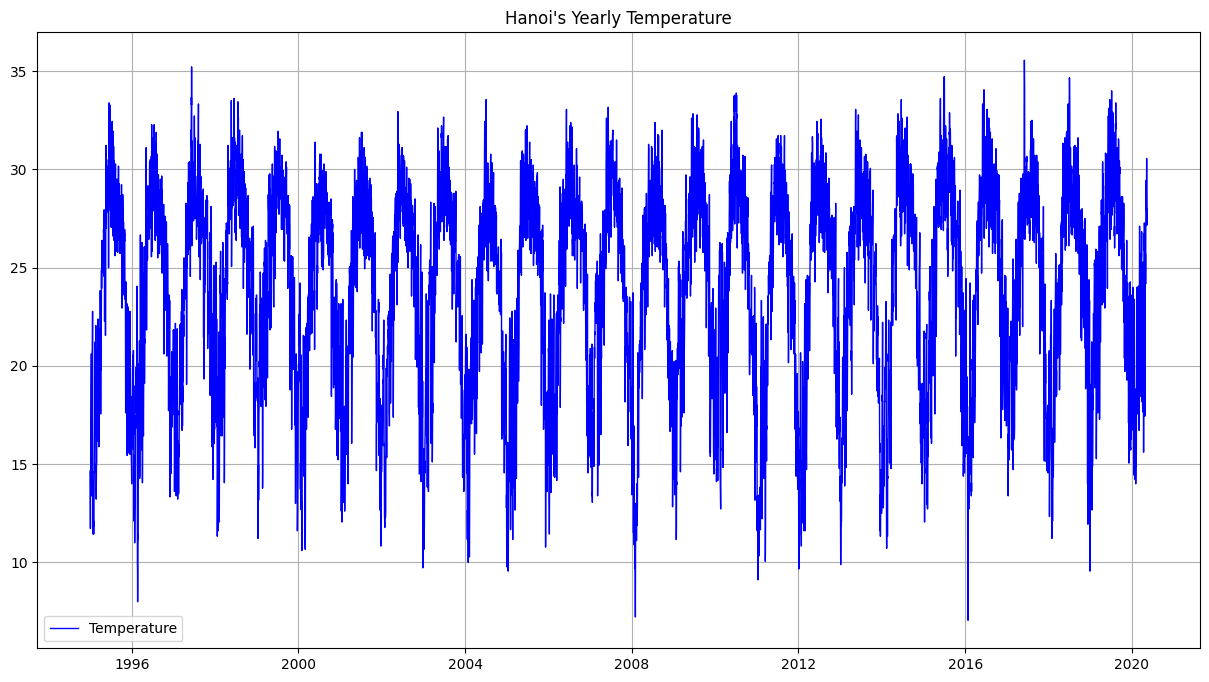

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.title("Hanoi's Yearly Temperature")
plt.plot(df['datetime'], df['TempInCelcius'], color = 'blue', linewidth = 1, label = "Temperature")
plt.grid()
plt.legend(loc ="lower left")

# Prepare data for training

In [16]:
n_df = df[["datetime", 'TempInCelcius']]
n_df = n_df.reset_index()
n_df = n_df.drop(columns=["index"])
n_df.head()

,datetime,TempInCelcius
0,1995-01-01,14.666667
1,1995-01-02,12.555556
2,1995-01-03,11.722222
3,1995-01-04,14.611111
4,1995-01-05,14.666667


In [17]:
print(f"Min date: {n_df['datetime'].min()}")
print(f"Max date: {n_df['datetime'].max()}")

Min date: 1995-01-01 00:00:00
Max date: 2020-05-13 00:00:00


In [18]:
# Extract the temperature column as feature "X"
X = n_df["TempInCelcius"].values.reshape(-1, 1)
X.shape

(9230, 1)

In [19]:
X

array([[14.66666667],
       [12.55555556],
       [11.72222222],
       ...,
       [29.16666667],
       [27.16666667],
       [28.        ]])

In [20]:
dataset_length = len(n_df)
dataset_length

9230

In [21]:
# Calculating the number of data points for each split
train_size = int(0.7 * dataset_length) # 70% for training
val_size = int(0.15 * dataset_length) # 15% for validating
test_size = int(0.15 * dataset_length) # 15% for testing

# Creating training, validation, and test datasets
training_data = X[:train_size]
val_data = X[train_size:train_size + val_size]
test_data = X[train_size + val_size:]

# Print information about the splits
print(f"Total dataset length: {dataset_length}")
print(f"Training set length: {train_size}")
print(f"Validation set length: {val_size}")
print(f"Test set length: {test_size}")

Total dataset length: 9230
Training set length: 6461
Validation set length: 1384
Test set length: 1384


In [22]:
training_data

array([[14.66666667],
       [12.55555556],
       [11.72222222],
       ...,
       [24.77777778],
       [28.27777778],
       [29.11111111]])

In [23]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)
val_set_scaled = sc.fit_transform(val_data)
test_set_scaled = sc.fit_transform(test_data)

In [24]:
training_set_scaled

array([[0.26587302],
       [0.19047619],
       [0.16071429],
       ...,
       [0.62698413],
       [0.75198413],
       [0.78174603]])

In [25]:
import numpy as np


input_size=100 # how many days would you like to input to predict

# Train data
X_train = []
y_train = []
for i in range(input_size, len(training_data)):
    X_train.append(training_set_scaled[i-input_size:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Validation Data 
X_val = []
y_val = []
for i in range(input_size, len(val_data)):
    X_val.append(val_set_scaled[i-input_size:i, 0])
    y_val.append(val_set_scaled[i, 0])

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Test Data 
X_test = []
y_test = []
for i in range(input_size, len(test_data)):
    X_test.append(test_set_scaled[i-input_size:i, 0])
    y_test.append(test_set_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
# 6461 training samples, each with an input sequence length of 100 and each sequence containing one feature
X_train[:, :, :].shape

(6361, 100, 1)

In [27]:
print(X_test)

[[[0.88675214]
  [0.85470085]
  [0.83974359]
  ...
  [0.7542735 ]
  [0.75213675]
  [0.61965812]]

 [[0.85470085]
  [0.83974359]
  [0.76709402]
  ...
  [0.75213675]
  [0.61965812]
  [0.71581197]]

 [[0.83974359]
  [0.76709402]
  [0.77991453]
  ...
  [0.61965812]
  [0.71581197]
  [0.71794872]]

 ...

 [[0.2457265 ]
  [0.32692308]
  [0.26282051]
  ...
  [0.70512821]
  [0.7457265 ]
  [0.80769231]]

 [[0.32692308]
  [0.26282051]
  [0.17094017]
  ...
  [0.7457265 ]
  [0.80769231]
  [0.7542735 ]]

 [[0.26282051]
  [0.17094017]
  [0.19017094]
  ...
  [0.80769231]
  [0.7542735 ]
  [0.67735043]]]


# Building model and train

In [28]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


model = Sequential([
    LSTM(units = 50, return_sequences= True ,input_shape =(X_train.shape[1],1)),
    Dropout(.2),
    LSTM(units = 50, return_sequences= True),
    Dropout(.2),
    LSTM(units = 50, return_sequences= True),
    Dropout(.2),
    LSTM(units = 50, return_sequences= True),
    Dropout(.2),
    LSTM(units = 50),
    Dropout(.2),
    Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           2

In [30]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error


callbacks = [
            EarlyStopping(patience = 50, verbose=1),
            ReduceLROnPlateau(factor = 0.5, patience = 10, min_lr = 0.000001, verbose=1),
    ]

model.compile(optimizer='adam',loss= 'mean_squared_error')

In [31]:
epochs = 100
batch_size = 64

history = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs=epochs,
    callbacks=callbacks,
    batch_size=batch_size
)

Epoch 1/100
100/100 [==============================] - 21s 70ms/step - loss: 0.0325 - val_loss: 0.0136 - lr: 0.0010
Epoch 2/100
100/100 [==============================] - 4s 40ms/step - loss: 0.0151 - val_loss: 0.0131 - lr: 0.0010
Epoch 3/100
100/100 [==============================] - 5s 52ms/step - loss: 0.0148 - val_loss: 0.0156 - lr: 0.0010
Epoch 4/100
100/100 [==============================] - 5s 50ms/step - loss: 0.0141 - val_loss: 0.0140 - lr: 0.0010
Epoch 5/100
100/100 [==============================] - 5s 49ms/step - loss: 0.0141 - val_loss: 0.0124 - lr: 0.0010
Epoch 6/100
100/100 [==============================] - 4s 44ms/step - loss: 0.0132 - val_loss: 0.0116 - lr: 0.0010
Epoch 7/100
100/100 [==============================] - 4s 44ms/step - loss: 0.0128 - val_loss: 0.0112 - lr: 0.0010
Epoch 8/100
100/100 [==============================] - 4s 44ms/step - loss: 0.0120 - val_loss: 0.0101 - lr: 0.0010
Epoch 9/100
100/100 [==============================] - 5s 48ms/step - loss: 0.0

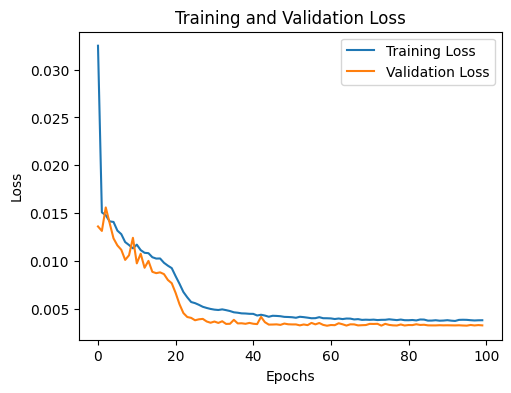

In [32]:
# Access the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))
# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Predicting Phrase

In [33]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

41/41 [==============================] - 2s 15ms/step


,test,pred
0,0.715812,0.631829
1,0.717949,0.715424
2,0.726496,0.710060
3,0.664530,0.720787
4,0.459402,0.672365
...,...,...
1280,0.745726,0.671862
1281,0.807692,0.716775
1282,0.754274,0.754135
1283,0.677350,0.696369


Text(500, 1.25, 'Mean Absolute Error :0.05')

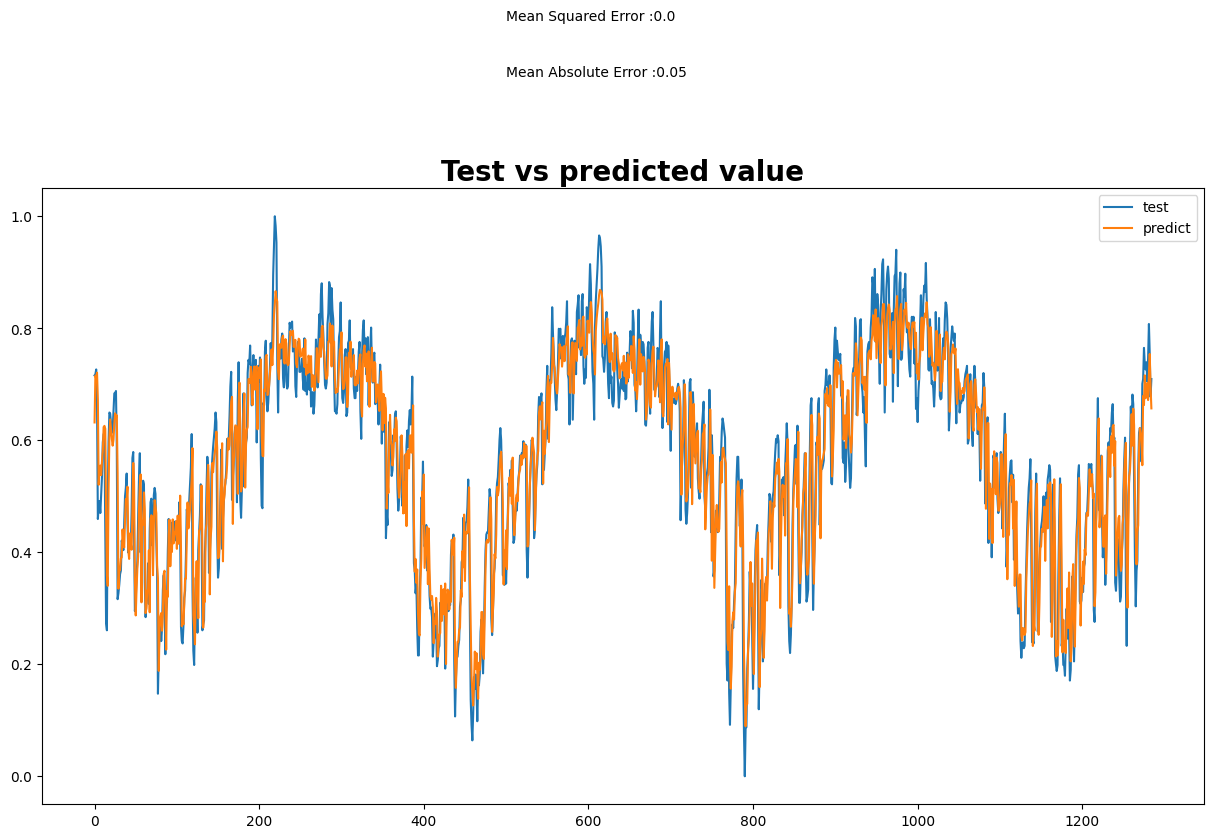

In [34]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs predicted value",size=20,weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_absolute_error(y_test,pred),2)
plt.text(x=500,y=1.35 ,s='Mean Squared Error :{}'.format(mse))
plt.text(x=500,y=1.25, s='Mean Absolute Error :{}'.format(mae))

# Reasltic use

In [35]:
X_test[-2:-1,0:100].shape

(1, 100, 1)

In [36]:
X_test[-2:-1,0:100]

array([[[0.32692308],
        [0.26282051],
        [0.17094017],
        [0.19017094],
        [0.30982906],
        [0.35683761],
        [0.27564103],
        [0.20512821],
        [0.28205128],
        [0.37606838],
        [0.43162393],
        [0.46153846],
        [0.53846154],
        [0.55555556],
        [0.31196581],
        [0.30769231],
        [0.31410256],
        [0.35470085],
        [0.32905983],
        [0.37393162],
        [0.38034188],
        [0.44230769],
        [0.47008547],
        [0.47222222],
        [0.50641026],
        [0.55769231],
        [0.55128205],
        [0.54700855],
        [0.55769231],
        [0.52350427],
        [0.51068376],
        [0.29700855],
        [0.27564103],
        [0.41239316],
        [0.47649573],
        [0.59401709],
        [0.67521368],
        [0.53632479],
        [0.47435897],
        [0.52136752],
        [0.57264957],
        [0.46153846],
        [0.39102564],
        [0.42521368],
        [0.44017094],
        [0

In [37]:
pred=model.predict(X_test[-2:-1,0:100])
pred.shape

1/1 [==============================] - 0s 31ms/step


(1, 1)

In [38]:
today_temp = sc.inverse_transform(X_test[:, 99])
tomorrow_temp = sc.inverse_transform(pred)

In [39]:
print(today_temp)
print(tomorrow_temp)

[[25.66666667]
 [28.16666667]
 [28.22222222]
 ...
 [30.55555556]
 [29.16666667]
 [27.16666667]]
[[27.661142]]


In [40]:
temps = np.concatenate((today_temp, tomorrow_temp))
temps = np.ravel(temps)
temps.shape

(1286,)

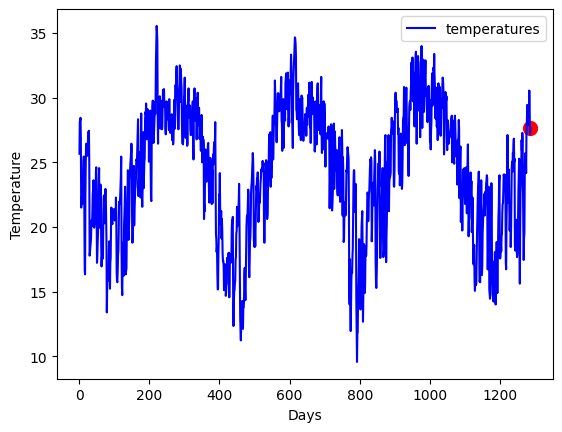

In [41]:
plt.plot([i for i in range(1, len(temps) + 1)], temps, "b-", label="temperatures")
plt.scatter([len(temps)], tomorrow_temp[0], s=100, c='red')
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.show()